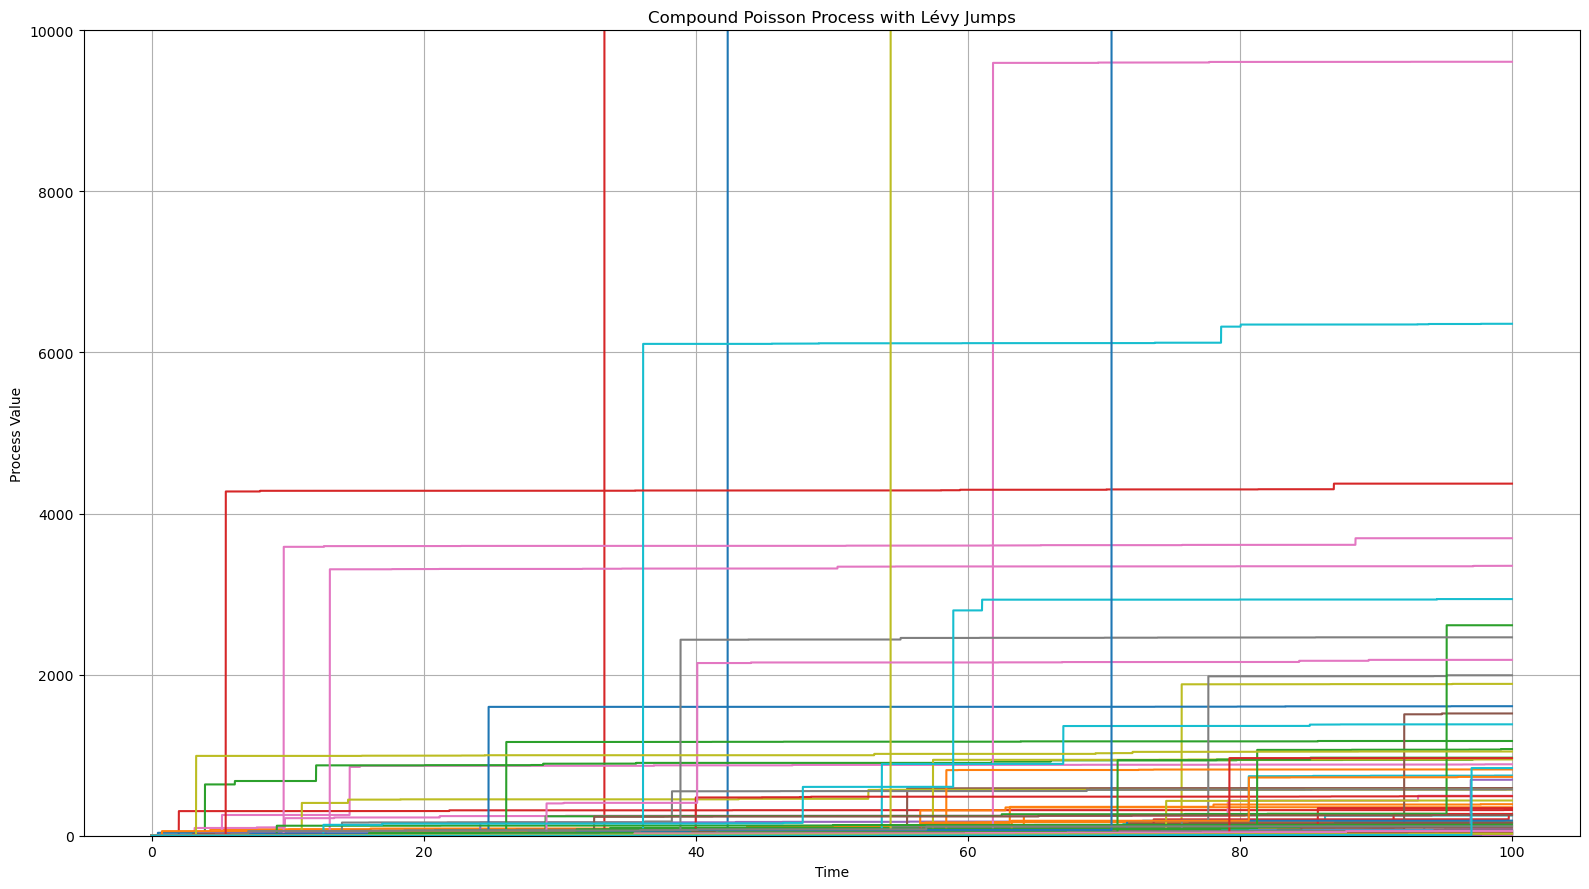

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from bisect import bisect_right
# generate C(t)

def generate_levy_jump(omega, xi):
    u = np.random.uniform(0, 1)
    v = np.random.uniform(-0.5, 0.5)
    term = (np.cos(np.pi * v) / (-np.log(u))) ** 2
    return omega + xi * term

def compound_poisson(lambda_rate, omega, xi, T, N):
    times = np.linspace(0, T, N+1)
    n_events = np.random.poisson(lambda_rate * T)

    if n_events == 0:
        return times, np.zeros(N+1)

    event_times = np.sort(np.random.uniform(0, T, n_events))
    jumps = np.array([generate_levy_jump(omega, xi) for _ in range(n_events)])
    cum_jumps = np.cumsum(jumps)

    path = np.zeros(N+1)
    for i in range(N+1):
        t = times[i]
        k = bisect_right(event_times, t)
        path[i] = cum_jumps[k - 1] if k > 0 else 0.0

    return times, path

plt.figure(figsize=(16, 9))
lambda_rate = 0.1      
omega = 1.0           
xi = 1.0             
T = 100.0              
N = 10000               
n = 100
for i in range(n):
    times, path = compound_poisson(lambda_rate, omega, xi, T, N)
    plt.plot(times, path,)
plt.xlabel('Time')
plt.ylabel('Process Value')
plt.title('Compound Poisson Process with Lévy Jumps')
plt.ylim(0, 10000)
plt.grid(True)
plt.tight_layout()
plt.show()

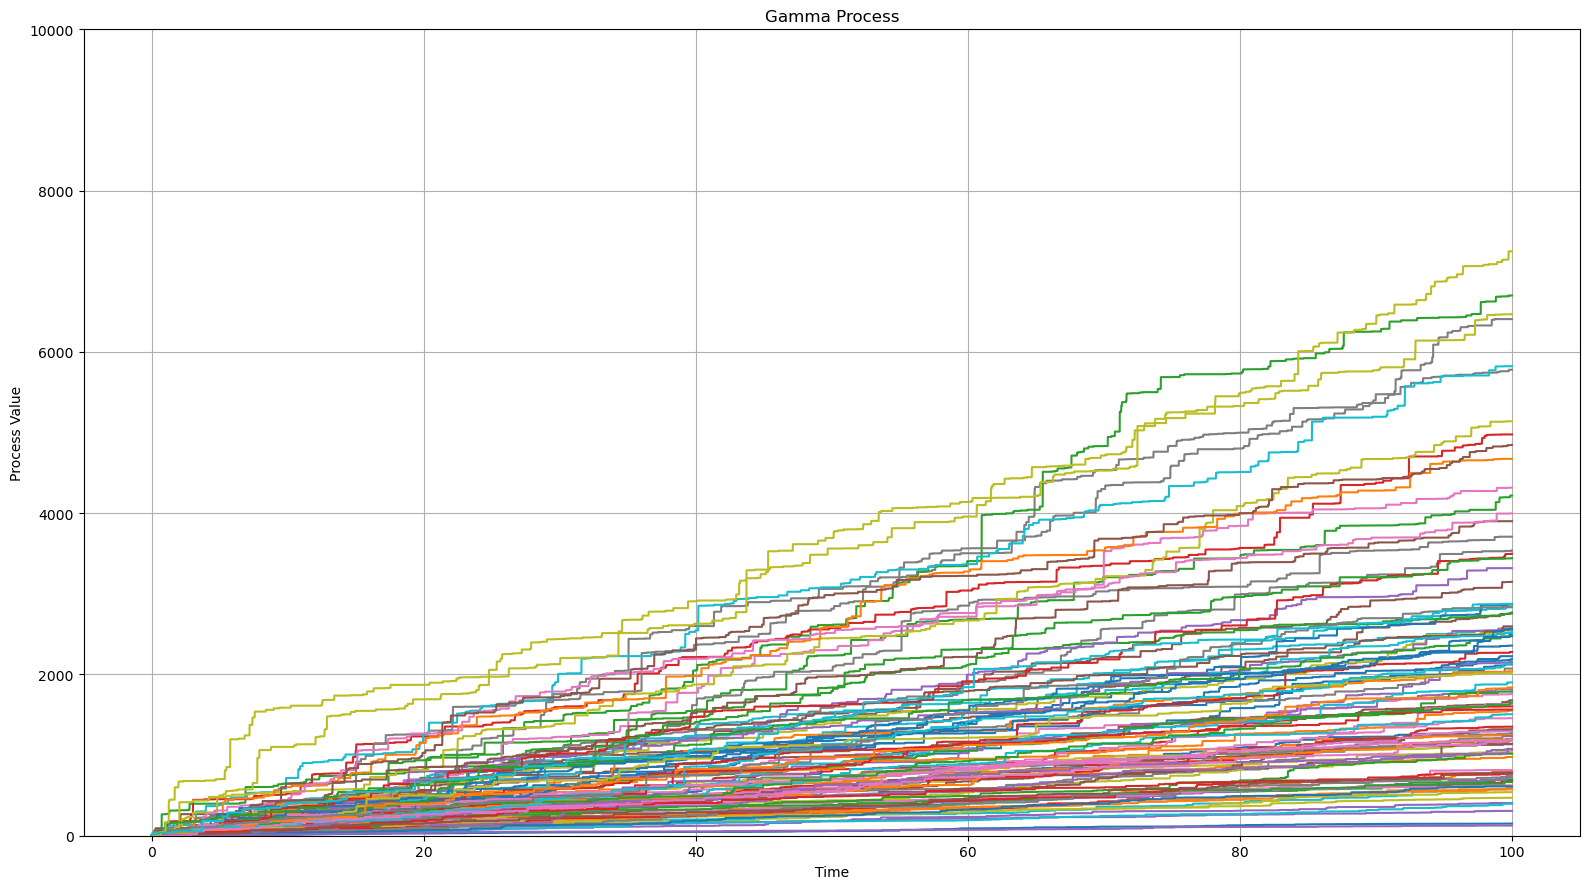

In [52]:
# Generate G(t) 

def generate_gamma(e, gamma, T, N, alpha): 
    beta = np.random.gamma(shape=e, scale=(1/gamma)) 
    times = np.linspace(0, T, N+1) 
    G = np.zeros(N+1) 

    for i in range(1, N+1):
        t_prev = times[i-1]
        t_curr = times[i]
        delta_alpha = alpha * t_curr - alpha * t_prev

        delta_G = np.random.gamma(shape=delta_alpha, scale=beta)
        G[i] = G[i-1] + delta_G
    return times, G 

e = 2.0
gamma = 0.05
T = 100.0
N = 10000
alpha = 0.5
n = 100 
plt.figure(figsize=(16, 9))
for i in range(n):
    times, path = generate_gamma(
        e,
        gamma,
        T,
        N,
        alpha,
    )
    plt.plot(times, path,)
plt.xlabel('Time')
plt.ylabel('Process Value')
plt.title('Gamma Process')
plt.ylim(0, 10000)
plt.grid(True)
plt.tight_layout()
plt.show()

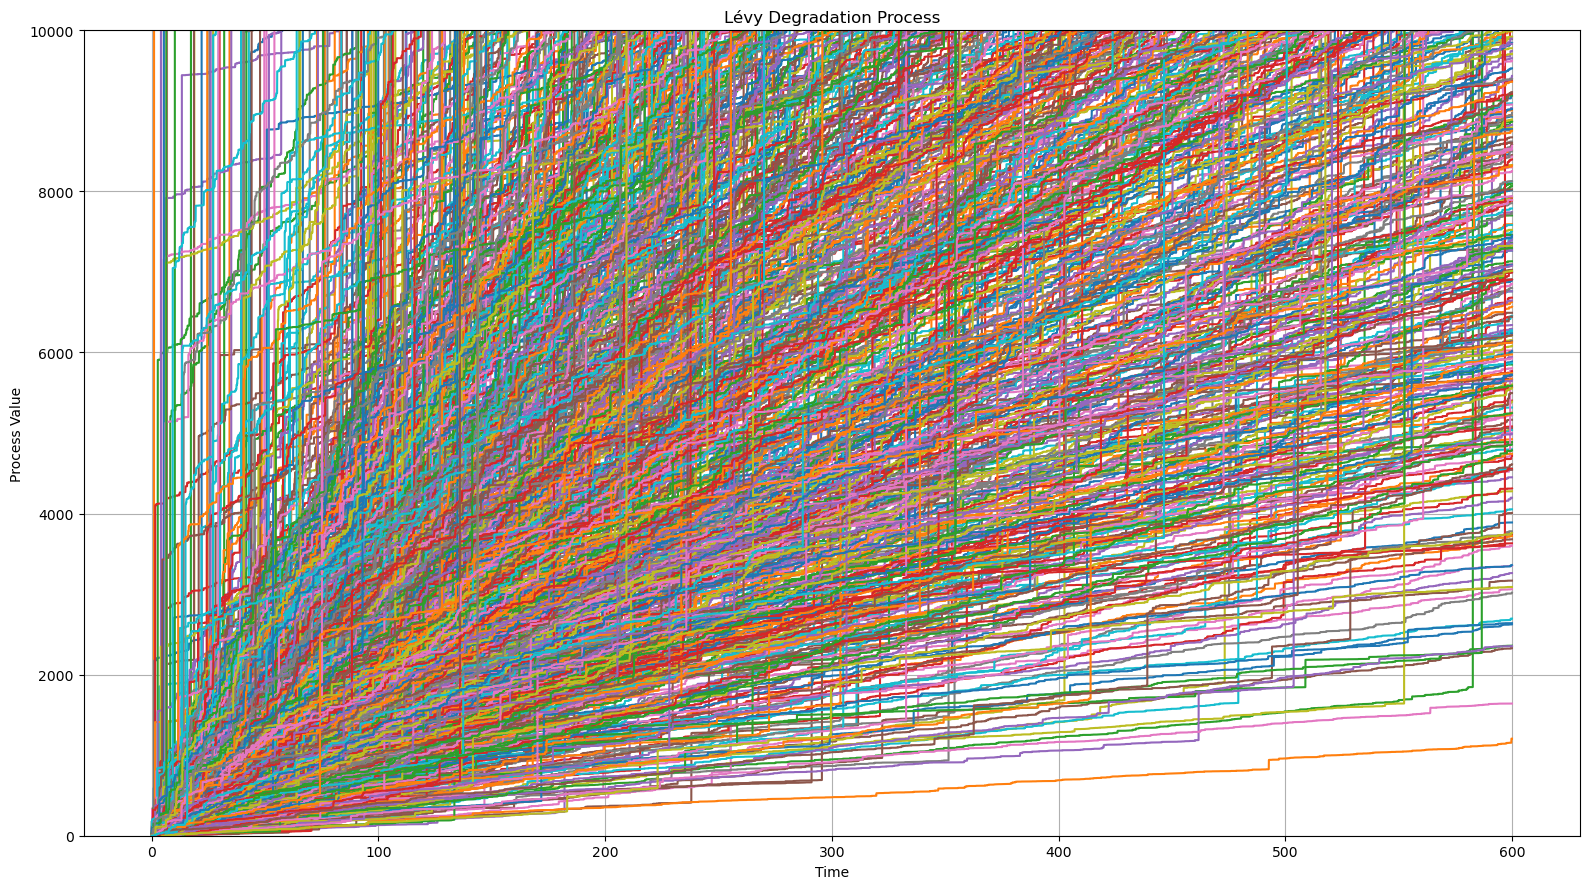

(1000, 10001)


In [67]:
#generate X(t) 

def generate_levy_jump(omega, xi):
    u = np.random.uniform(0, 1)
    v = np.random.uniform(-0.5, 0.5)
    term = (np.cos(np.pi * v) / (-np.log(u))) ** 2
    return omega + xi * term

def compound_poisson(lambda_rate, omega, xi, T, N):
    times = np.linspace(0, T, N+1)
    n_events = np.random.poisson(lambda_rate * T)

    if n_events == 0:
        return times, np.zeros(N+1)

    event_times = np.sort(np.random.uniform(0, T, n_events))
    jumps = np.array([generate_levy_jump(omega, xi) for _ in range(n_events)])
    cum_jumps = np.cumsum(jumps)

    path = np.zeros(N+1)
    for i in range(N+1):
        t = times[i]
        k = bisect_right(event_times, t)
        path[i] = cum_jumps[k - 1] if k > 0 else 0.0

    return times, path

def generate_gamma(e, gamma, T, N, alpha): 
    beta = np.random.gamma(shape=e, scale=(1/gamma)) 
    times = np.linspace(0, T, N+1) 
    G = np.zeros(N+1) 

    for i in range(1, N+1):
        t_prev = times[i-1]
        t_curr = times[i]
        delta_alpha = alpha * t_curr - alpha * t_prev

        delta_G = np.random.gamma(shape=delta_alpha, scale=beta)
        G[i] = G[i-1] + delta_G
    return times, G 

def generate_X(lambda_rate, omega, xi, e, gamma, T, N, alpha):
    times, path_1 = generate_gamma(
        e,
        gamma,
        T,
        N,
        alpha
    )
    _,path_2 = compound_poisson(
        lambda_rate,
        omega, 
        xi, 
        T, 
        N
    )
    path = path_1 + path_2
    return times, path
lambda_rate = 0.1     
omega = 1.0           
xi = 1.0 
e = 2.0
gamma = 0.05
T = 600.0
N = 10000
alpha = 0.5
n = 1000

plt.figure(figsize=(16, 9))
paths = []
for i in range(n):
    times, path = generate_X(
        lambda_rate,
        omega, 
        xi, 
        e, 
        gamma,
        T,
        N,
        alpha
    )
    paths.append(path)
    plt.plot(times, path,)
plt.xlabel('Time')
plt.ylabel('Process Value')
plt.title('Lévy Degradation Process')
plt.ylim(0, 10000)
plt.grid(True)
plt.tight_layout()
plt.show()
paths = np.array(paths)
print(paths.shape)

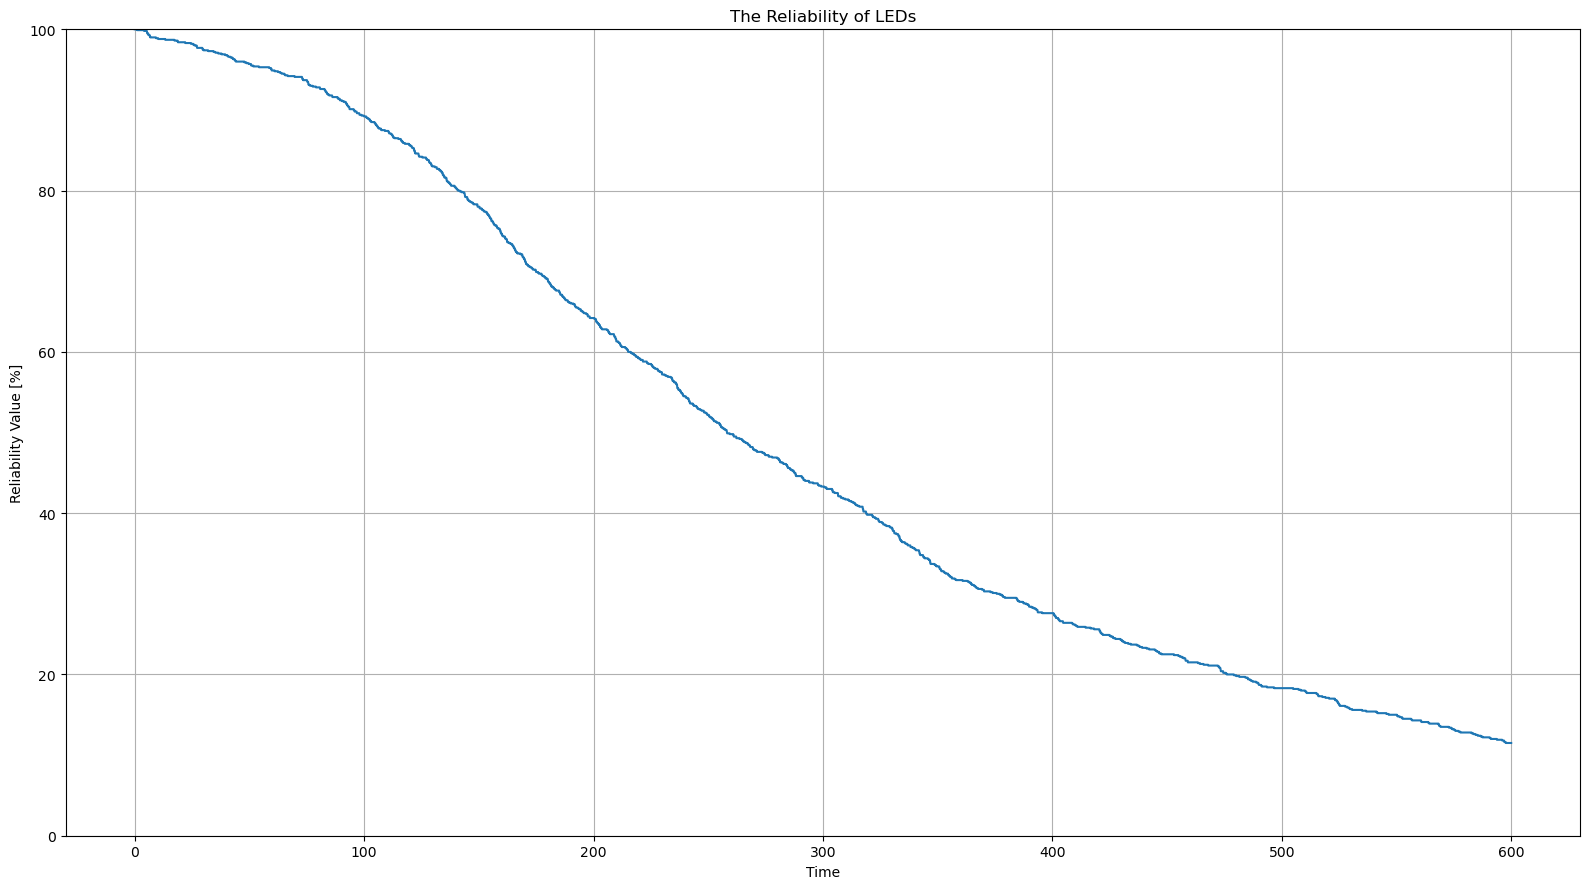

In [68]:
reliability = np.zeros(N+1)
for i in range(N+1):
    threshold = 7000
    num_failure = np.sum(paths[:,i] >= threshold)
    fail_rate = num_failure / n
    reliability[i] = 1 - fail_rate
plt.figure(figsize=(16,9))
plt.plot(times, reliability * 100)
plt.xlabel('Time')
plt.ylabel('Reliability Value [%]')
plt.title('The Reliability of LEDs')
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()